In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.float_format', '{:.30f}'.format)

In [5]:
data = pd.read_csv('Contributions_to_Candidates_and_Political_Committees.csv')
print(data['election_year'].describe())


C:\Users\dkasanders\AppData\Local\Temp\ipykernel_15408\651271472.py:1: DtypeWarning: Columns (11,12,21,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Contributions_to_Candidates_and_Political_Committees.csv')


count   6419562.000000000000000000000000000000
mean       2016.331567169224399549420922994614
std           4.971693191150428958735574269667
min        2007.000000000000000000000000000000
25%        2012.000000000000000000000000000000
50%        2017.000000000000000000000000000000
75%        2020.000000000000000000000000000000
max        2029.000000000000000000000000000000
Name: election_year, dtype: float64


In [6]:
print(data['election_year'].min())
print(data['election_year'].max())

2007
2029


In [9]:
print(data.isnull().sum())

id                                  0
report_number                       0
origin                              0
committee_id                        0
filer_id                            0
type                                0
filer_name                          0
office                        3825723
legislative_district          5610457
position                      5863958
party                         3659270
ballot_number                 6238509
for_or_against                6055112
jurisdiction                  3721729
jurisdiction_county           4519833
jurisdiction_type             3721729
election_year                       0
amount                              0
cash_or_in_kind                     0
receipt_date                     8612
description                   5987647
memo                          6308814
primary_general                297387
code                                0
contributor_category                0
contributor_name                    0
contributor_

C:\Users\dkasanders\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dkasanders\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dkasanders\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dkasanders\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylik

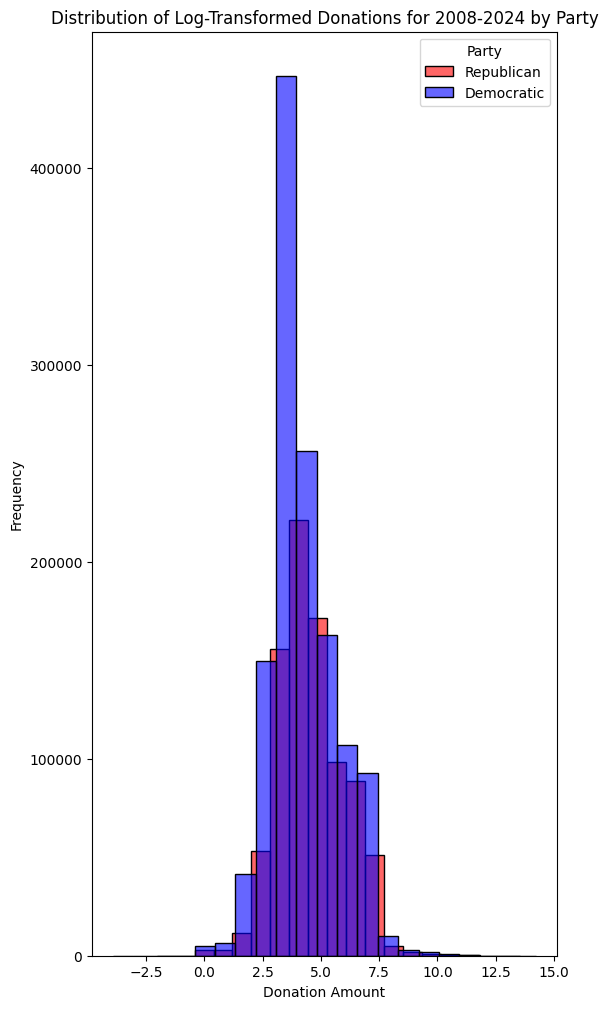

In [7]:
plt.figure(figsize=(6,12))
sns.histplot(np.log1p(data[data['party'] == 'REPUBLICAN']['amount']), color='red',  label='Republican', bins=20,alpha=0.6)
sns.histplot(np.log1p(data[data['party'] == 'DEMOCRATIC']['amount']), color='blue',  label='Democratic',  bins=20,alpha=0.6)
plt.xlabel('Donation Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Donations for 2008-2024 by Party')
plt.legend(title='Party')
plt.show()

In [7]:
print(data[data['party'] == 'DEMOCRATIC']['amount'].describe())

count   1285969.000000000000000000000000000000
mean        287.085371295886602638347540050745
std        3166.174505010304073948645964264870
min      -90000.000000000000000000000000000000
25%          25.000000000000000000000000000000
50%          50.000000000000000000000000000000
75%         200.000000000000000000000000000000
max      775000.000000000000000000000000000000
Name: amount, dtype: float64


In [8]:
print(data[data['party'] == 'REPUBLICAN']['amount'].describe())

count    866973.000000000000000000000000000000
mean        316.382811909944166472996585071087
std        3341.549274033201982092577964067459
min      -39000.000000000000000000000000000000
25%          35.000000000000000000000000000000
50%          75.000000000000000000000000000000
75%         245.000000000000000000000000000000
max     1500000.000000000000000000000000000000
Name: amount, dtype: float64


In [ ]:

print(data.isna().sum())


id                                  0
report_number                       0
origin                              0
committee_id                        0
filer_id                            0
type                                0
filer_name                          0
office                        3855837
legislative_district          5655782
position                      5905727
party                         3701669
ballot_number                 6283429
for_or_against                6098632
jurisdiction                  3747355
jurisdiction_county           4545485
jurisdiction_type             3747355
election_year                       0
amount                              0
cash_or_in_kind                     0
receipt_date                     9162
description                   6029581
memo                          6356536
primary_general                303121
code                                0
contributor_category                0
contributor_name                    0
contributor_

In [10]:
missing_office = data[data['office'].isna()]

print(missing_office.head())

         id  report_number origin  committee_id    filer_id  \
0    117169      101013305     C3         26046  KSHAM--122   
5  15731560      110073015     C3          2573  CANDP  507   
6  15732235      110073015     C3          2573  CANDP  507   
7  15733324      110073015     C3          2573  CANDP  507   
8  15733593      110073015     C3          2573  CANDP  507   

                  type                                      filer_name office  \
0  Political Committee                Kshama Solidarity Campaign (KSC)    NaN   
5  Political Committee  WASHINGTON REALTORS POLITICAL ACTION COMMITTEE    NaN   
6  Political Committee  WASHINGTON REALTORS POLITICAL ACTION COMMITTEE    NaN   
7  Political Committee  WASHINGTON REALTORS POLITICAL ACTION COMMITTEE    NaN   
8  Political Committee  WASHINGTON REALTORS POLITICAL ACTION COMMITTEE    NaN   

   legislative_district position  ...       contributor_address  \
0                   NaN      NaN  ...    1414 10TH AVE APT 836E   


In [11]:
print(data['origin'].value_counts())

origin
C3     6219226
B.1     111723
AU       63026
C.1      20005
C.3       5582
Name: count, dtype: int64


In [13]:
print(data.head())

         id  report_number origin  committee_id    filer_id  \
0    117169      101013305     C3         26046  KSHAM--122   
1  13213272      100245406     C3         16754  ROSSD  029   
2  13213470      100245406     C3         16754  ROSSD  029   
3  13213623      100245406     C3         16754  ROSSD  029   
4  13264196      100276722     C3         16754  ROSSD  029   

                  type                        filer_name    office  \
0  Political Committee  Kshama Solidarity Campaign (KSC)       NaN   
1            Candidate                      ROSSI DINO J  GOVERNOR   
2            Candidate                      ROSSI DINO J  GOVERNOR   
3            Candidate                      ROSSI DINO J  GOVERNOR   
4            Candidate                      ROSSI DINO J  GOVERNOR   

   legislative_district position  ...     contributor_address  \
0                   NaN      NaN  ...  1414 10TH AVE APT 836E   
1                   NaN      NaN  ...      302 E BROADWAY AVE   
2    

In [25]:
print(data.columns)

Index(['id', 'report_number', 'origin', 'committee_id', 'filer_id', 'type',
       'filer_name', 'office', 'legislative_district', 'position', 'party',
       'ballot_number', 'for_or_against', 'jurisdiction',
       'jurisdiction_county', 'jurisdiction_type', 'election_year', 'amount',
       'cash_or_in_kind', 'receipt_date', 'description', 'memo',
       'primary_general', 'code', 'contributor_category', 'contributor_name',
       'contributor_address', 'contributor_city', 'contributor_state',
       'contributor_zip', 'contributor_occupation',
       'contributor_employer_name', 'contributor_employer_city',
       'contributor_employer_state', 'url', 'contributor_location'],
      dtype='object')


In [45]:
print(data['amount'].dtype)

float64


In [55]:
print(data['amount'].mean())
print(data['amount'].std())
print(data['amount'].max())
print(data['amount'].min())

308.4600030360324
10594.149977360732
8929810.0
-2500000.0


In [5]:
print(len(data[data['amount'] <= 200]))

5515277


In [ ]:
print(data['contributor_name'])

In [9]:
data[["longitude", "latitude"]] = data["contributor_location"].str.extract(r"POINT \((-?\d+\.\d*) (-?\d+\.\d*)\)").astype(float)

In [6]:
percentile_90 = data['amount'].quantile(0.99)
print(data[data['amount'] >= percentile_90]['position'].value_counts())


position
State Representative Pos. 2                   874
State Representative Pos. 1                   763
Justice Position 2                            119
Port Commissioner Position 3                   98
Superior Court Judge Position 1                92
Port Commissioner Position 2                   86
Port Commissioner Position 4                   70
Superior Court Judge Position 8                59
County Commissioner Position 3                 54
Superior Court Judge Position 2                50
Superior Court Judge Position 4                49
City Council Member Position 7                 47
County Commissioner Position 1                 46
Port Commissioner Position 1                   44
County Commissioner Position 2                 42
Judge Position 19                              40
Port Commissioner Position 5                   37
Superior Court Judge Position 10               34
Superior Court Judge Position 3                34
CITY COUNCIL MEMBER, POSITION 8          

In [7]:
position_by_year = data[data['amount'] >= percentile_90].groupby(['election_year', 'party'])['amount'].sum().reset_index()
print(position_by_year)

     election_year         party       amount
0             2008    DEMOCRATIC  15417990.16
1             2008   INDEPENDENT      2500.00
2             2008  NON PARTISAN   1584329.40
3             2008          NONE     17883.78
4             2008         OTHER      5000.00
5             2008    REPUBLICAN   8516515.92
6             2009    DEMOCRATIC   1845336.70
7             2009  NON PARTISAN   2301164.96
8             2009    REPUBLICAN    784789.69
9             2010    DEMOCRATIC   6192218.28
10            2010  NON PARTISAN    791873.22
11            2010          NONE     26537.08
12            2010         OTHER     18626.75
13            2010    REPUBLICAN   5428269.20
14            2011    DEMOCRATIC   2179731.89
15            2011  NON PARTISAN   1016908.97
16            2011          NONE     98786.61
17            2011         OTHER      3000.00
18            2011    REPUBLICAN   1010549.51
19            2012    DEMOCRATIC  13981096.44
20            2012   INDEPENDENT  

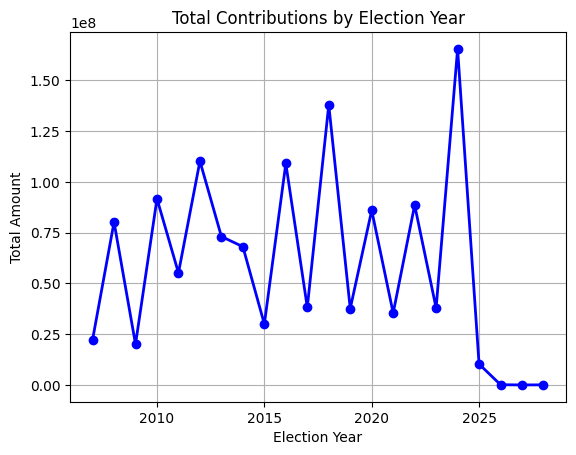

In [23]:
plt.plot(position_by_year['election_year'], position_by_year['amount'], marker='o', color='blue',linestyle='-', linewidth=2)
plt.title('Total Contributions by Election Year')
plt.xlabel('Election Year')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

In [9]:
print(position_by_year)

election_year  position                                  
2011           Superior Court Judge Position 10                3
2016           City Council Member Position 7                  3
2017           At-Large Position A                             2
2018           State Representative Pos. 2                   217
               State Representative Pos. 1                   191
               County Commissioner Position 3                 20
               Superior Court Judge Position 2                20
               Superior Court Judge Position 10               19
               Judge District 3, Position 1                   16
               Superior Court Judge Position 3                16
               Commissioner Distict At-Large B                13
               District Court Judge  1                        12
               Judge Position No. 1                           10
               Commissioner Distict At-Large A                 9
               Public Utility Co

In [ ]:
plt.hist(data[data['amount'] >= percentile_90]['amount'], bins='auto')
plt.title('Distribution of Contribution Amounts (99th Percentile)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In a solid blue state, do Democrats continually outperform Republicans in fundraising?

In [10]:
party_fundraising_by_year = data.groupby(['election_year', 'party'])['amount'].sum().reset_index()

In [11]:
party_fundraising_by_year = party_fundraising_by_year[(party_fundraising_by_year['party'].isin(['REPUBLICAN', 'DEMOCRATIC'])) & (party_fundraising_by_year['election_year'].between(2008,2024))]
print(party_fundraising_by_year)

     election_year       party                                  amount
1             2008  DEMOCRATIC 42544349.549999997019767761230468750000
7             2008  REPUBLICAN 31271977.859999999403953552246093750000
8             2009  DEMOCRATIC  3168919.649999999906867742538452148438
12            2009  REPUBLICAN  2436131.600000000093132257461547851562
13            2010  DEMOCRATIC 19661888.120000001043081283569335937500
17            2010  REPUBLICAN 16443569.750000000000000000000000000000
19            2011  DEMOCRATIC  3921058.739999999757856130599975585938
23            2011  REPUBLICAN  2250856.000000000000000000000000000000
25            2012  DEMOCRATIC 40586119.549999997019767761230468750000
30            2012  REPUBLICAN 38419306.590000003576278686523437500000
31            2013  DEMOCRATIC  3750937.490000000223517417907714843750
38            2013  REPUBLICAN  3425974.939999999944120645523071289062
41            2014  DEMOCRATIC 21685404.239999998360872268676757812500
48    

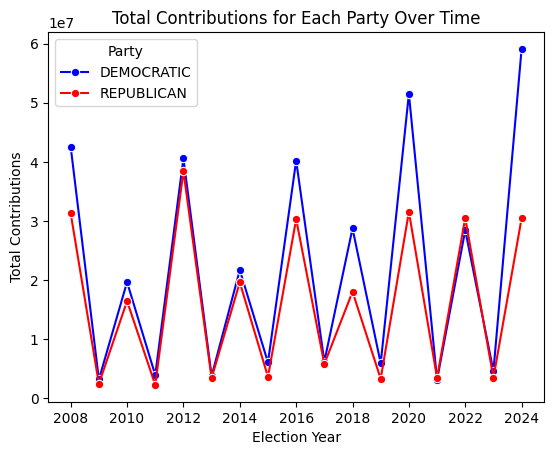

In [12]:
party_colors = {'REPUBLICAN': 'red', 'DEMOCRATIC': 'blue'}

sns.lineplot(data=party_fundraising_by_year, x='election_year', y='amount', hue='party', marker='o', palette=party_colors)

plt.xlabel('Election Year')
plt.ylabel('Total Contributions')
plt.title('Total Contributions for Each Party Over Time')

plt.legend(title='Party')
plt.show()

Things of note:

- It seems that Democratic donations are increasing across time, while Republican donations are remaining stagnant. What does a regression show us?
- The only time Republicans outperformed Democrats were during the 2022 midterms. Republican donation amounts otherwise are less than Democrats. 
- During and following the 2020 election, Republicans were able to consisently fundraise ~3 million


Regression:

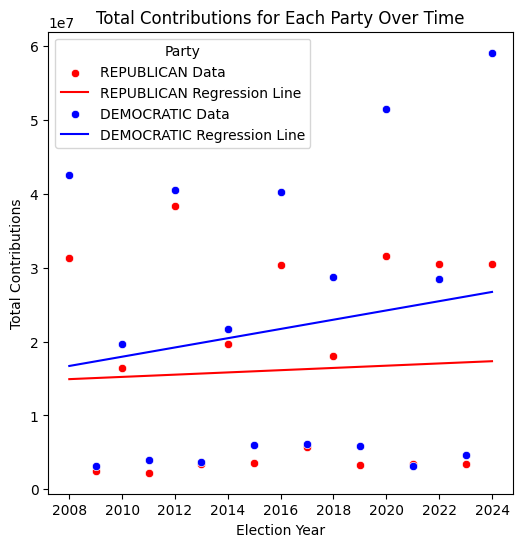

In [18]:

plt.figure(figsize=(6,6))

for party in party_colors.keys():
    party_data = party_fundraising_by_year[party_fundraising_by_year['party'] == party]
    X = party_data[['election_year']]
    Y = party_data['amount']
    model = LinearRegression()
    model.fit(X, Y)

    Y_PRED = model.predict(X)

    sns.scatterplot(data=party_data, x='election_year', y='amount', color=party_colors[party], label=f'{party} Data')
    plt.plot(party_data['election_year'], Y_PRED, color=party_colors[party], linestyle='-', label=f'{party} Regression Line')


plt.xlabel('Election Year')
plt.ylabel('Total Contributions')
plt.title('Total Contributions for Each Party Over Time')

plt.legend(title='Party')
plt.show()

Both parties are increasing in total donation amounts each year, with Republicans only narrowly increasing over time. If we adjust for inflation, how do these trends hold up? 

For this question, we will use CPI data, and use the year 2024 as our base.

I am pulling CPI data from https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-


REPUBLICAN
     election_year
7             2008
12            2009
17            2010
23            2011
30            2012
38            2013
48            2014
56            2015
64            2016
71            2017
78            2018
86            2019
94            2020
100           2021
108           2022
115           2023
123           2024
7     39124193.550274565815925598144531250000
12     3570721.561958041507750749588012695312
17    23704073.037138927727937698364257812500
23     3146594.603823921177536249160766601562
30    52609015.644146338105201721191406250000
38     4622860.605733904987573623657226562500
48    26060997.676552601158618927001953125000
56     4793166.309468354098498821258544921875
64    39708916.093899995088577270507812500000
71     7429874.644895960576832294464111328125
78    22572068.771230582147836685180664062500
86     4040719.064653891138732433319091796875
94    38322653.329428121447563171386718750000
100    4004643.421018449589610099792480468750
108

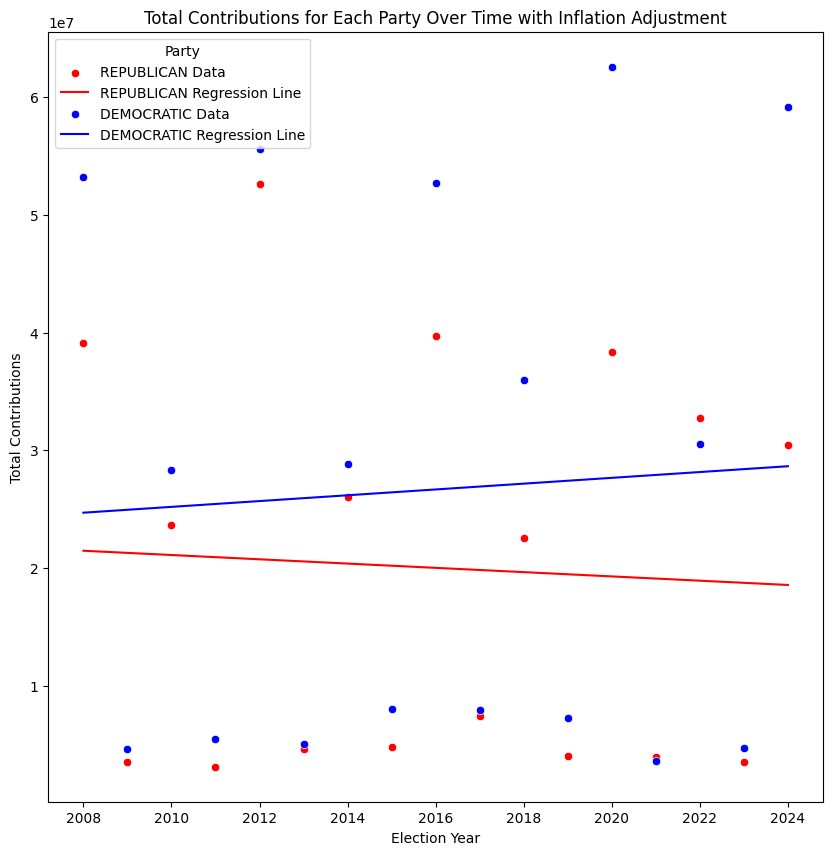

In [19]:
cpi = {
    2008: 251.3,
    2009: 214.5,
    2010: 218.1,
    2011: 224.9,
    2012: 229.6,
    2013: 233.0,
    2014: 236.7,
    2015: 237.0,
    2016: 240.0,
    2017: 245.1,
    2018: 251.1,
    2019: 255.7,
    2020: 258.8,
    2021: 271.0,
    2022: 292.7,
    2023: 304.7,
    2024: 314.4
}

base_cpi = cpi[2024]

party_fundraising_by_year['adjusted_amount'] = party_fundraising_by_year.apply(
    lambda row: row['amount'] * (base_cpi / cpi[row['election_year']]), axis=1
)

plt.figure(figsize=(10,10))

for party in party_colors.keys():
    party_data = party_fundraising_by_year[party_fundraising_by_year['party'] == party]
    X = party_data[['election_year']]
    Y = party_data['adjusted_amount']
    model = LinearRegression()
    model.fit(X, Y)

    Y_PRED = model.predict(X)

    sns.scatterplot(data=party_data, x='election_year', y='adjusted_amount', color=party_colors[party], label=f'{party} Data')
    plt.plot(party_data['election_year'], Y_PRED, color=party_colors[party], linestyle='-', label=f'{party} Regression Line')
    print(party)
    print(X)
    print(Y)


plt.xlabel('Election Year')
plt.ylabel('Total Contributions')
plt.title('Total Contributions for Each Party Over Time with Inflation Adjustment')

plt.legend(title='Party')
plt.show()

In [ ]:
print(model.s)

In [15]:
grouped = party_fundraising_by_year.groupby(['election_year', 'party'])['amount'].sum().unstack(fill_value=0)

grouped['Difference'] = grouped.get('DEMOCRATIC', 0) - grouped.get('REPUBLICAN', 0)

print(grouped['Difference'].sort_values(ascending=False))

election_year
2024    28668864.05
2020    19957762.22
2008    11272371.69
2018    10708074.55
2016     9894777.12
2010     3218318.37
2019     2618351.27
2015     2437589.98
2012     2166812.96
2014     2065053.89
2011     1670202.74
2023     1147684.83
2009      732788.05
2017      397028.32
2013      324962.55
2021     -327268.36
2022    -2065841.98
Name: Difference, dtype: float64


When adjusting for inflation, we see that fundraising for the Democratic party has still increased, while fundraising for the Republican party has actually decreased. 

We also see that Republicans only outperform the Democrats in fundraising in 2021, what was happening in 2021?

In [19]:
data_2021 = data[data['election_year'] == 2021]
data_2021 = data_2021[data_2021['party'].isin(['REPUBLICAN', 'DEMOCRATIC'])]



In [5]:
print(data_2021.groupby('party')['amount'].describe())

              count        mean          std     min   25%   50%    75%  \
party                                                                     
DEMOCRATIC  14037.0  222.595372  3131.484245 -3500.0  10.0  25.0   50.0   
REPUBLICAN  11258.0  306.612150  2101.817679 -5750.0  25.0  55.0  150.0   

                 max  
party                 
DEMOCRATIC  300000.0  
REPUBLICAN  110000.0  


In [9]:
print(data_2021.groupby('party')['amount'].sum())

party
DEMOCRATIC    3124571.23
REPUBLICAN    3451839.59
Name: amount, dtype: float64


party       amount                             
DEMOCRATIC  25.000000000000000000000000000000      167
            50.000000000000000000000000000000      137
            100.000000000000000000000000000000     122
            10.000000000000000000000000000000       29
            250.000000000000000000000000000000      22
            15.000000000000000000000000000000       21
            500.000000000000000000000000000000      18
            5.000000000000000000000000000000        12
            20.000000000000000000000000000000       12
            1000.000000000000000000000000000000     11
            2.000000000000000000000000000000        10
            300.000000000000000000000000000000       8
            30.000000000000000000000000000000        7
            44.000000000000000000000000000000        7
            200.000000000000000000000000000000       7
            3.850000000000000088817841970013         6
            19.239999999999998436805981327780        6
            35.00

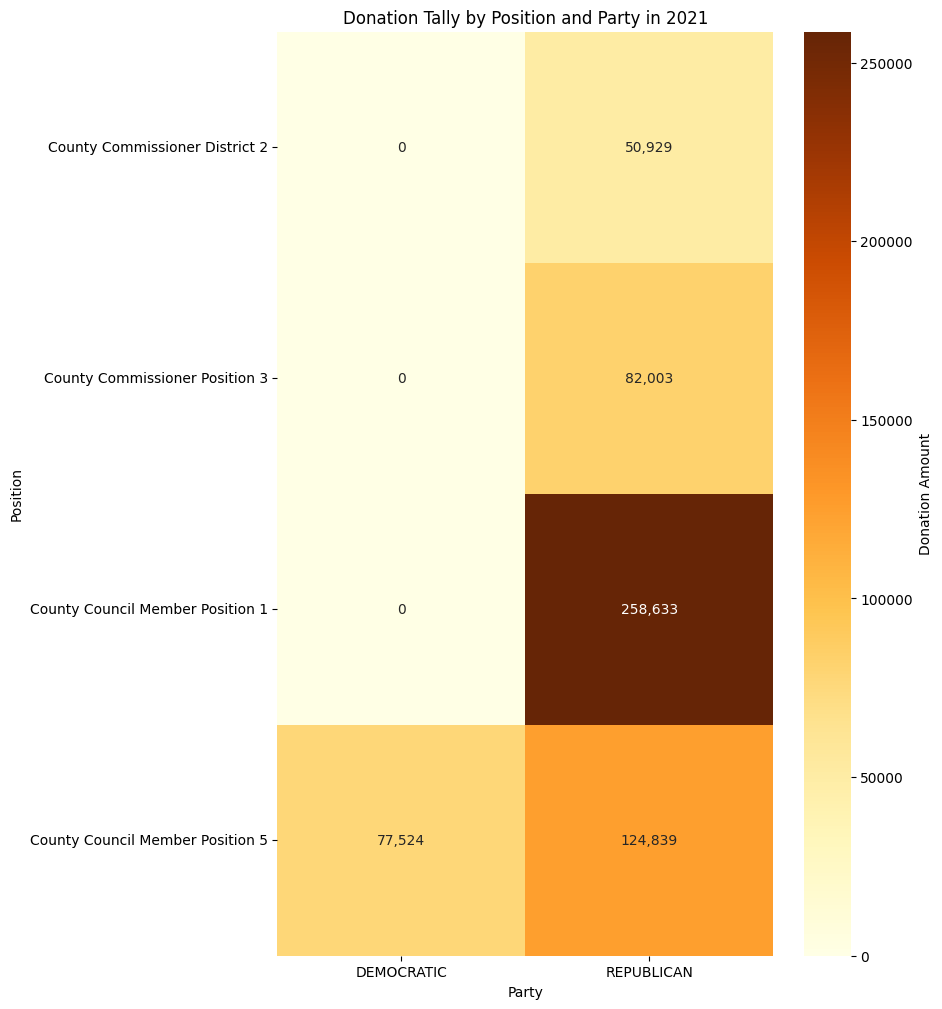

position
County Council Member Position 5    716
Name: count, dtype: int64


In [ ]:
#print(data_2021[data_2021['party'] == 'REPUBLICAN']['position'].value_counts())
#print(data_2021[data_2021['party'] == 'DEMOCRATIC']['position'].value_counts())
#print(data_2021['position'].value_counts())
#print(data_2021[(data_2021['party'] == 'DEMOCRATIC') & (data_2021['position'] == 'County Council Member Position 5')])




print(data_2021[data_2021['position'] == 'County Council Member Position 5'].groupby('party')['amount'].value_counts())


data_2021_pivot = data_2021.pivot_table(index='position', columns='party', values='amount', aggfunc='sum', fill_value=0)
plt.figure(figsize=(4,6))
sns.heatmap(data_2021_pivot, annot=True, cmap='YlOrBr', cbar_kws={'label': 'Donation Amount'}, fmt=',.0f')

plt.title('Donation Tally by Position and Party in 2021')
plt.xlabel('Party')
plt.ylabel('Position')
plt.show()
print(data_2021[data_2021['party'] == 'DEMOCRATIC']['position'].value_counts())


In [26]:
print(data_2021[data_2021['position'] == 'County Council Member Position 5'])

               id  report_number origin  committee_id    filer_id       type  \
1099138  14527524      110012108     C3         26287  SEARJ  251  Candidate   
1099188  14527527      110012108     C3         26287  SEARJ  251  Candidate   
1099275  14527523      110012108     C3         26287  SEARJ  251  Candidate   
1099315  14527532      110012108     C3         26287  SEARJ  251  Candidate   
1099390  14527525      110012108     C3         26287  SEARJ  251  Candidate   
1099677  14527526      110012108     C3         26287  SEARJ  251  Candidate   
1123190  14434251      110008702     C3         26287  SEARJ  251  Candidate   
1123248  14434252      110008702     C3         26287  SEARJ  251  Candidate   
1123305  14434257      110008702     C3         26287  SEARJ  251  Candidate   
1123312  14434249      110008702     C3         26287  SEARJ  251  Candidate   
1123313  14434250      110008702     C3         26287  SEARJ  251  Candidate   
1149733  14312168      110004654     C3 

C:\Users\dkasanders\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dkasanders\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


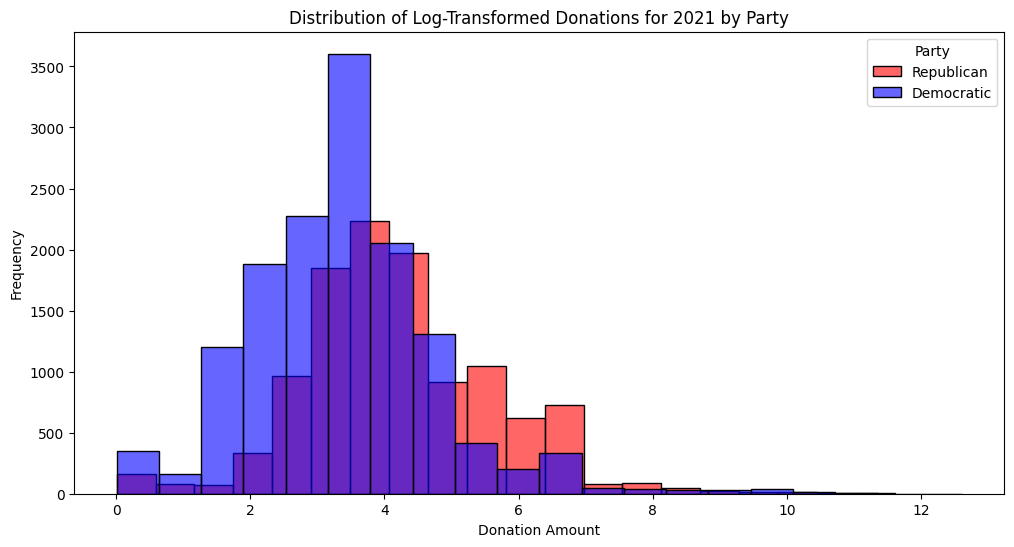

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(np.log1p(data_2021[data_2021['party'] == 'REPUBLICAN']['amount']), color='red',  label='Republican', bins=20,alpha=0.6)
sns.histplot(np.log1p(data_2021[data_2021['party'] == 'DEMOCRATIC']['amount']), color='blue',  label='Democratic',  bins=20,alpha=0.6)
plt.xlabel('Donation Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Donations for 2021 by Party')
plt.legend(title='Party')
plt.show()

In [23]:
print(data_2021[(data_2021['party'] == 'REPUBLICAN') & (data_2021['position'] == 'County Council Member Position 1')]['amount'].sum())

258632.88


In [40]:
print(data_2021[((data_2021['party'] == 'REPUBLICAN' ) | (data_2021['party'] == 'DEMOCRATIC')) & (data_2021['position'].isna())].groupby('party')['amount'].sum())

party
DEMOCRATIC    3047047.68
REPUBLICAN    2935436.07
Name: amount, dtype: float64


So, to explain the anomaly of Republicans out-fundraising Democrats in 2021:

- Despite Democrats having more people donate, Republican donations were on average more compared to Democrats.
- We see more frequency in Democrat donations, but Republicans take up more high-dollar donations. 
- Donations in 2021 for Republicans was spent on position specific fundraising goals, with $258,633 worth of donations going to County Council Member Position 1 in Snohomish.
    - This ultimately led to Republican candidate Nate Nehring winning that election with 70.23% of the vote.
- Non-position specific donations were spent on fundraising for House and Senate organizations and larger commitee groups.

In [10]:
high_profile = ['ATTORNEY GENERAL', 'GOVERNOR', 'INSURANCE COMMISSIONER', 'LIEUTENANT GOVERNOR', 'PUBLIC LANDS COMMISSIONER', 'PUBLIC UTILITY COMMISSIONER', 'SECRETARY OF STATE', 'STATE AUDITOR', 'STATE REPRESENTATIVE', 'STATE SENATOR', 'STATE TREASURER']
low_profile = ['CITY COUNCIL MEMBER', 'COUNTY ASSESSOR', 'COUNTY AUDITOR', 'COUNTY CLERK', 'COUNTY COMMISSIONER', 'COUNTY CORONER', 'COUNTY COUNCIL MEMBER', 'COUNTY EXECUTIVE', 'COUNTY PROSECUTOR', 'COUNTY SHERRIF', 'COUNTY TREASURER', 'FIRE COMNISSIONER', 'MAYOR', 'PORT COMMISSIONER', 'SCHOOL DIRECTOR']



grouped_data = data[(data['election_year'].between(2008, 2024))  & (data['party'].isin(['REPUBLICAN', 'DEMOCRATIC']))].groupby(['office', 'election_year', 'party'])['amount'].sum().reset_index()

pivot_df = grouped_data.pivot(index=['office', 'election_year'], columns='party', values='amount').fillna(0)
pivot_df.columns = ['DEMOCRATIC', 'REPUBLICAN']

pivot_df['Winner'] = pivot_df.apply(lambda row: 'Democratic' if row['DEMOCRATIC'] > row['REPUBLICAN'] else 'Republican', axis=1)
pivot_df['office_type'] = pivot_df.index.get_level_values('office').map(lambda x: 'High-Profile' if x in high_profile else 'Local')
win_counts = pivot_df.groupby('office_type')['Winner'].value_counts()
print(win_counts)

office_type   Winner    
High-Profile  Democratic    55
              Republican    16
Local         Republican    56
              Democratic    44
Name: count, dtype: int64


In [12]:
pivot_df['Difference'] = pivot_df['DEMOCRATIC'] - pivot_df['REPUBLICAN']
mean_difference = pivot_df.groupby('office_type')['Difference'].mean()
print(mean_difference)

office_type
High-Profile   1032803.005774647812359035015106201172
Local           -29345.064700000002630986273288726807
Name: Difference, dtype: float64


    office_type      Winner  count
0  High-Profile  Democratic     55
1  High-Profile  Republican     16
2         Local  Republican     56
3         Local  Democratic     44


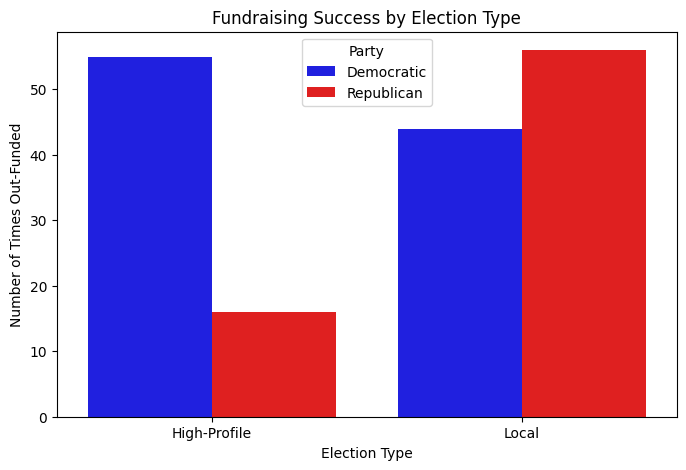

In [11]:
win_counts = win_counts.reset_index()
win_counts.columns = ['office_type', 'Winner', 'count']
print(win_counts)
plt.figure(figsize=(8,5))
sns.barplot(data=win_counts
            , x='office_type', y='count', hue='Winner', palette={'Democratic': 'blue', 'Republican': 'red'})
plt.xlabel('Election Type')
plt.ylabel('Number of Times Out-Funded')
plt.title('Fundraising Success by Election Type')
plt.legend(title='Party')
plt.show()

In [28]:
data_2022 = data[data['election_year'] == 2022]
data_2022 = data_2022[data_2022['party'].isin(['REPUBLICAN', 'DEMOCRATIC'])]

In [41]:
print(data_2022.groupby('party')['amount'].sum())

party
DEMOCRATIC    28439237.66
REPUBLICAN    30505079.64
Name: amount, dtype: float64


In [39]:
print(data_2022.groupby('party')['amount'].sum())

party
DEMOCRATIC   28439237.660000000149011611938476562500
REPUBLICAN   30505079.640000000596046447753906250000
Name: amount, dtype: float64


In [37]:
print(data_2022.groupby(['party', 'position'])['amount'].sum().sort_values(ascending=False))

party       position                          
DEMOCRATIC  State Representative Pos. 2          5573945.919999999925494194030761718750
REPUBLICAN  State Representative Pos. 2          5155175.339999999850988388061523437500
            State Representative Pos. 1          4879488.750000000000000000000000000000
DEMOCRATIC  State Representative Pos. 1          4753839.410000000149011611938476562500
REPUBLICAN  County Commissioner Position 3        483119.450000000011641532182693481445
            Commissioner District 3               248543.959999999991850927472114562988
            County Commissioner Position 2        227565.869999999995343387126922607422
DEMOCRATIC  Commissioner District 5               196360.059999999997671693563461303711
            County Commissioner Position 3        195943.970000000001164153218269348145
REPUBLICAN  Commissioner District 5               178588.470000000001164153218269348145
DEMOCRATIC  County Council Member Position 7      163169.9299999999930150

In [38]:
print(data_2022[data_2022['party'] == 'REPUBLICAN']['position'].value_counts().head(5))
print(data_2022[data_2022['party'] == 'DEMOCRATIC']['position'].value_counts().head(5))
print(data_2022['position'].value_counts().head(5))

position
State Representative Pos. 1       10606
State Representative Pos. 2       10233
County Commissioner Position 3     1818
Commissioner District 3             681
County Commissioner Position 2      535
Name: count, dtype: int64
position
State Representative Pos. 2         16484
State Representative Pos. 1         14706
County Council Member Position 7     1077
County Commissioner Position 3       1076
Commissioner District 5               943
Name: count, dtype: int64
position
State Representative Pos. 2         26717
State Representative Pos. 1         25312
County Commissioner Position 3       2894
County Council Member Position 7     1429
Commissioner District 5              1253
Name: count, dtype: int64


C:\Users\dkasanders\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dkasanders\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dkasanders\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dkasanders\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylik

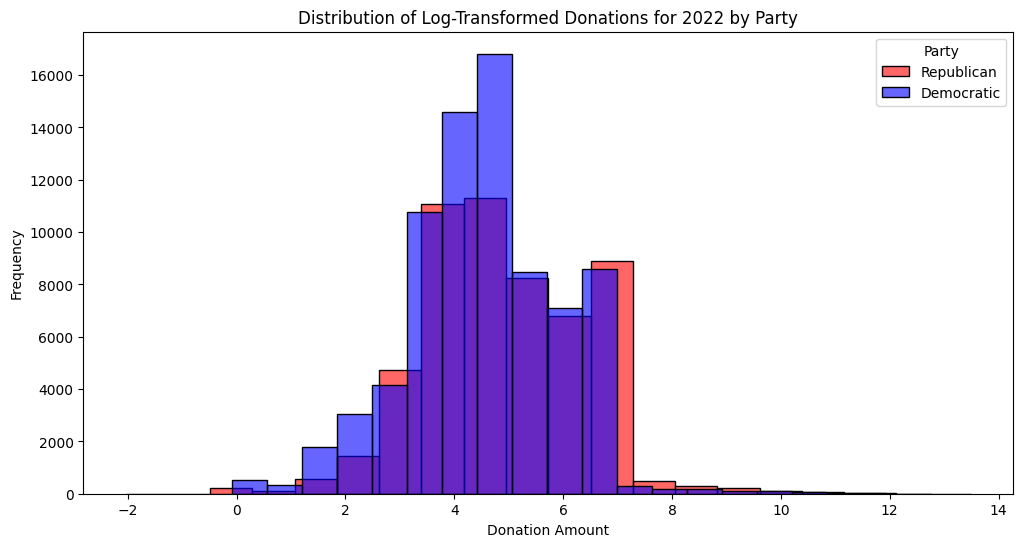

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(np.log1p(data_2022[data_2022['party'] == 'REPUBLICAN']['amount']), color='red',  label='Republican', bins=20,alpha=0.6)
sns.histplot(np.log1p(data_2022[data_2022['party'] == 'DEMOCRATIC']['amount']), color='blue',  label='Democratic',  bins=20,alpha=0.6)
plt.xlabel('Donation Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Donations for 2022 by Party')
plt.legend(title='Party')
plt.show()

In [51]:
print(data_2022[data_2022['position'] == 'State Representative Pos. 1'].groupby(['jurisdiction', 'party'])['amount'].sum().sort_values(ascending=False))

jurisdiction             party     
LEG DISTRICT 36 - HOUSE  DEMOCRATIC    564277.95
LEG DISTRICT 42 - HOUSE  DEMOCRATIC    563333.30
LEG DISTRICT 10 - HOUSE  DEMOCRATIC    534534.16
LEG DISTRICT 42 - HOUSE  REPUBLICAN    394683.68
LEG DISTRICT 26 - HOUSE  DEMOCRATIC    389804.27
LEG DISTRICT 10 - HOUSE  REPUBLICAN    351802.74
LEG DISTRICT 26 - HOUSE  REPUBLICAN    349599.22
LEG DISTRICT 30 - HOUSE  DEMOCRATIC    329147.11
LEG DISTRICT 31 - HOUSE  REPUBLICAN    304798.42
LEG DISTRICT 34 - HOUSE  DEMOCRATIC    297326.17
LEG DISTRICT 44 - HOUSE  REPUBLICAN    265878.31
LEG DISTRICT 03 - HOUSE  DEMOCRATIC    250694.75
LEG DISTRICT 02 - HOUSE  REPUBLICAN    249185.00
LEG DISTRICT 28 - HOUSE  REPUBLICAN    206594.95
LEG DISTRICT 17 - HOUSE  REPUBLICAN    206059.00
LEG DISTRICT 39 - HOUSE  REPUBLICAN    205314.82
LEG DISTRICT 22 - HOUSE  DEMOCRATIC    199433.51
LEG DISTRICT 38 - HOUSE  DEMOCRATIC    195008.99
LEG DISTRICT 18 - HOUSE  REPUBLICAN    192581.51
LEG DISTRICT 24 - HOUSE  DEMOCRAT

In [9]:
print(data.columns)

Index(['id', 'report_number', 'origin', 'committee_id', 'filer_id', 'type',
       'filer_name', 'office', 'legislative_district', 'position', 'party',
       'ballot_number', 'for_or_against', 'jurisdiction',
       'jurisdiction_county', 'jurisdiction_type', 'election_year', 'amount',
       'cash_or_in_kind', 'receipt_date', 'description', 'memo',
       'primary_general', 'code', 'contributor_category', 'contributor_name',
       'contributor_address', 'contributor_city', 'contributor_state',
       'contributor_zip', 'contributor_occupation',
       'contributor_employer_name', 'contributor_employer_city',
       'contributor_employer_state', 'url', 'contributor_location'],
      dtype='object')


In [ ]:
print(data['contributor_state'])

In [ ]:
print(data[data['party'].isin(['REPUBLICAN', 'DEMOCRATIC']) &  data['contributor_state'] == ''].groupby('party')['contributor_city'].value_counts())

party       contributor_city                      
DEMOCRATIC  SEATTLE                                   240342
            OLYMPIA                                    59226
            Seattle                                    54354
            TACOMA                                     33706
            SPOKANE                                    33436
            VANCOUVER                                  31529
            BELLINGHAM                                 30432
            BELLEVUE                                   21499
            BAINBRIDGE ISLAND                          14506
            EVERETT                                    13096
            KIRKLAND                                   12728
            Olympia                                    12324
            PORT TOWNSEND                              11395
            EDMONDS                                    10528
            RENTON                                     10451
            FEDERAL WAY           

In [5]:
land_data = pd.read_csv('General_Land_Use_Final_Dataset.csv')

In [8]:
print(land_data.columns)

Index(['OBJECTID', 'MASTER_CAT', 'SUB_CAT', 'URB', 'CITY_NM', 'AUPolyID',
       'NAME', 'LUCodeID', 'JoinID', 'FID', 'URB_1', 'CITY_NM_1', 'AUPolyID_1',
       'NAME_1', 'LUCodeID_1', 'SubCID', 'HU_2000', 'HU_2001', 'HU_2002',
       'HU_2003', 'HU_2004', 'HU_2005', 'HU_2006', 'HU_2007', 'HU_2008',
       'HU_2009', 'HU_2010', 'HU_2011', 'HU_2012', 'HU_2013', 'HU_2014',
       'HU_2015', 'HU_2016', 'HU_2017', 'NEW_HU_00_', 'PCT_NEW_00',
       'NEW_HU_10_', 'PCT_NEW_01', 'NEW_HU_01', 'NEW_HU_02', 'NEW_HU_03',
       'NEW_HU_04', 'NEW_HU_05', 'NEW_HU_06', 'NEW_HU_07', 'NEW_HU_08',
       'NEW_HU_09', 'NEW_HU_10', 'NEW_HU_11', 'NEW_HU_12', 'NEW_HU_13',
       'NEW_HU_14', 'NEW_HU_15', 'NEW_HU_16', 'NEW_HU_17', 'NEW_00_17',
       'PCT_NEW_02', 'NEW_00_05', 'NEW_06_10', 'NEW_11_15', 'NEW_16_17',
       'NEW_17', 'PCTNEW_00_', 'PCT_NEW_06', 'PCTNEW_11_', 'PCTNEW_16_',
       'PCT_NEW_17', 'HU_2017_Density', 'Acres', 'NEW_HU_17_Density',
       'NEW_00_17_Density', 'Shape__Area', 'Shape__L